Problem 2

You will repeat the previous problem but for the MNIST dataset which you will find here: https://www.openml.org/d/554. MNIST is a dataset of handwritten digits, and is considered one of the easiest image recognition problems in computer vision. We will see here how well logistic regression does, as you did above on the CIFAR-10 subset. In addition, we will see that we can visualize the solution, and that in connection to this, sparsity can be useful.

In [6]:
#Fetch the MNIST dataset.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
X = mnist["data"]
y = mnist["target"]

#Split the dataset into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Run multi-class logistic regression
clf = LogisticRegression(C=50/len(X_train), multi_class='multinomial', solver="saga", tol=0.1)
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
train_score = clf.score(X_train, y_train)
print("Training Score: ", train_score)
print("Test Score: ", test_score)
print('Best C % .4f' % clf.C)

#Report training and test loss
from sklearn.metrics import log_loss
y_train_pred = clf.predict_proba(X_train)
y_test_pred = clf.predict_proba(X_test)
train_loss = log_loss(y_train, y_train_pred)
test_loss = log_loss(y_test, y_test_pred)
print("Training Loss: ", train_loss)
print("Test Loss: ", test_loss)



Training Score:  0.8887619047619048
Test Score:  0.8853142857142857
Best C  0.0010
Training Loss:  0.4257361494413297
Test Loss:  0.43306988418432596


In [12]:
#Choose an ℓ1 regularizer (penalty), and see if you can get a sparse solution with almost as good accuracy.
clf = LogisticRegression(C=50/len(X_train), multi_class='multinomial', solver="saga", tol=0.1, penalty="l1")
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
test_score = clf.score(X_test, y_test)
train_score = clf.score(X_train, y_train)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % test_score)
print("Training Score with l1 penalty: ", train_score)

Sparsity with L1 penalty: 82.98%
Test score with L1 penalty: 0.8390
Training Score with l1 penalty:  0.8388


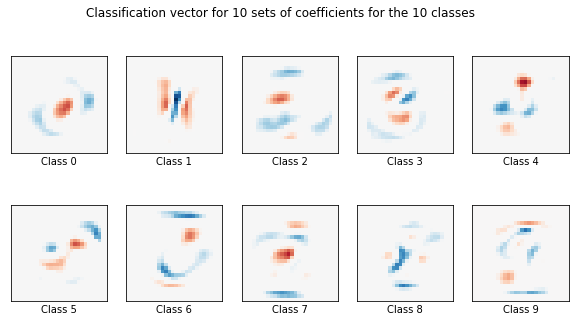

In [13]:
#Note that in Logistic Regression, the coefficients returned (i.e., the β’s) are the same dimension as the data.
#Therefore we can pretend that the coefficients of the solution are an image of the same dimension, and plot it.
#Do this for the 10 sets of coefficients that correspond to the 10 classes.
#You should observe that, at least for the sparse solutions, these “kind of” look like the digits they are classifying.

#Plot the coefficients
plt.figure(figsize=(10, 5))
scale = np.abs(clf.coef_).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(clf.coef_[i].reshape(28, 28), interpolation='nearest', cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for 10 sets of coefficients for the 10 classes')
plt.show()

